In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import h5py

In [41]:
cut_lens = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
cut_lens_test = [13, 120]
desired_shift = 3
max_shift = desired_shift * 2

In [61]:
### ----- Load the MLAAPDE testing dataset from HDF5 files ----- ###

hdf5_save_dir = '/hdd/mlaapde/decimated'

testing_data = h5py.File(hdf5_save_dir + '/testing_data.hdf5', 'r')
mlaa_snrs = testing_data['snr_db'][:]

testing_data.close()

In [62]:
len(mlaa_snrs)

324365

In [63]:
min(mlaa_snrs)

-75.6556888927

In [64]:
max(mlaa_snrs)

162.927618425

In [46]:
round_mlaa_snrs_5 = np.round(mlaa_snrs / 5) * 5

In [47]:
mlaa_snrs.shape

(324365,)

In [48]:
round_mlaa_snrs_5

array([10., -0., -0., ...,  0., -0.,  5.])

In [49]:
# How snr is calculated in MLAAPDE - try this with historic data

# noise = wave[:,0:(self.pre_event_sec-1)*self.resample_hz]
# idxp = self.pre_event_sec*self.resample_hz
# signal = wave[:,idxp:idxp+int(self.post_event_sec/2)*self.resample_hz]
# noise_rms = np.sqrt(np.mean(noise**2))
# signal_rms = np.sqrt(np.mean(signal**2))
# snr = signal_rms/noise_rms
# snr_db = 20*np.log(snr)

In [50]:
### ----- Load the historic testing dataset ----- ###

historic_path = '/hdd/mlaapde/decimated/'

historic_test_waves = np.load(historic_path + 'historic_test_waves.npy')
historic_test_mags = np.load(historic_path + 'historic_test_mags.npy')
print(historic_test_waves.shape)
n_channels_hist = 3

bad_hist_indices = np.loadtxt('/home/sdybing/mlaapde/codes/bad_historic_waves.txt').astype(int)

historic_test_waves_nonan = np.delete(historic_test_waves, bad_hist_indices, axis = 0)
historic_test_mags_nonan = np.delete(historic_test_mags, bad_hist_indices, axis = 0)

print(historic_test_waves.shape)
print(historic_test_waves_nonan.shape)
print(historic_test_mags.shape)
print(historic_test_mags_nonan.shape)

n_historic_test_samp = len(historic_test_waves_nonan)

(13449, 2400, 3)
(13449, 2400, 3)
(13151, 2400, 3)
(13449,)
(13151,)


In [51]:
hist_waves = historic_test_waves_nonan

In [52]:
hist_waves[0,0:60].shape

(60, 3)

In [53]:
# noise = wave[:,0:(self.pre_event_sec-1)*self.resample_hz]
# idxp = self.pre_event_sec*self.resample_hz
# signal = wave[:,idxp:idxp+int(self.post_event_sec/2)*self.resample_hz]
# noise_rms = np.sqrt(np.mean(noise**2))
# signal_rms = np.sqrt(np.mean(signal**2))
# snr = signal_rms/noise_rms
# snr_db = 20*np.log(snr)

In [54]:
hist_snrs = []

for idx in range(len(hist_waves)):
    
    wave = hist_waves[idx]
#     print(wave.shape)
    noise = hist_waves[idx, 0 : 59*20]
#     print(noise.shape)
    signal = hist_waves[idx, 60*20 : 60*20 + 30*20]
#     print(signal.shape)
    noise_rms = np.sqrt(np.mean(noise**2))
#     print(noise_rms)
    signal_rms = np.sqrt(np.mean(signal**2))
#     print(signal_rms)
    snr = signal_rms/noise_rms
#     print(snr)
    snr_db = 20*np.log(snr)
#     print(snr_db)

    hist_snrs.append(snr_db)

In [55]:
hist_snrs_arr = np.array(hist_snrs)

In [56]:
hist_snrs_arr.shape

(13151,)

In [57]:
round_hist_snrs_5 = np.round(hist_snrs_arr / 5) * 5

In [58]:
round_snrs_5 = np.concatenate((round_mlaa_snrs_5, round_hist_snrs_5))

In [59]:
round_snrs_5.shape

(337516,)

7


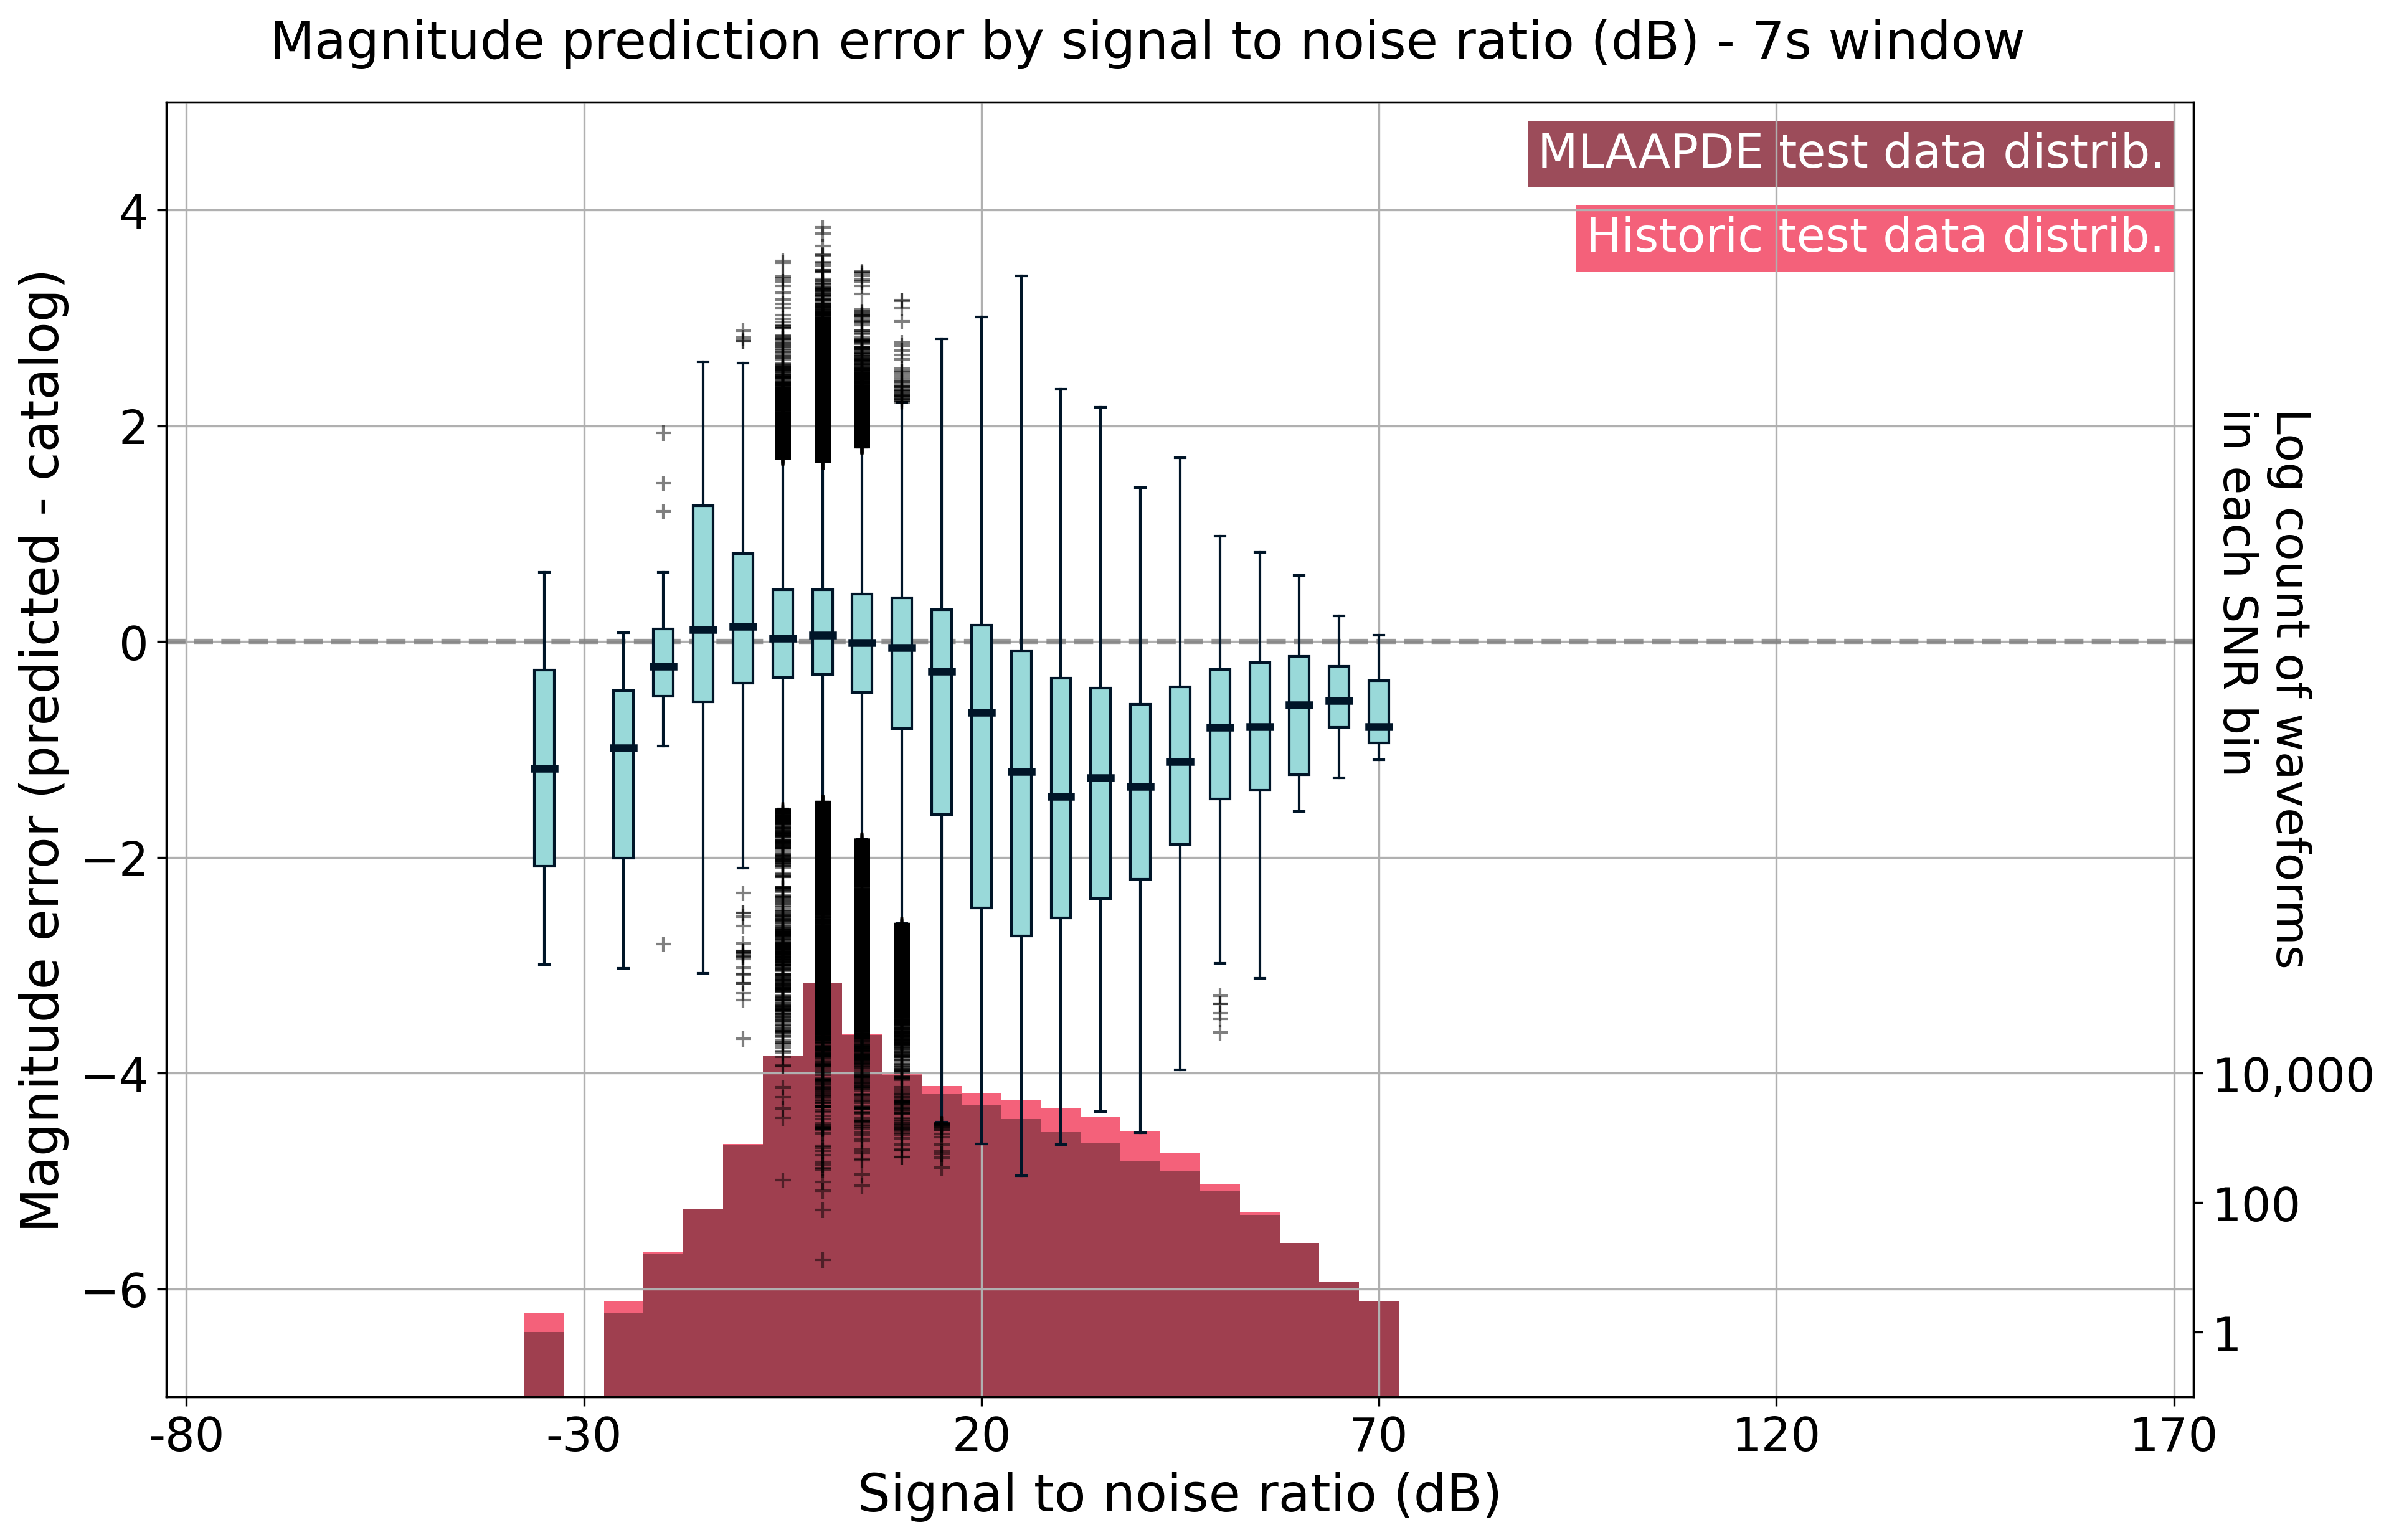

114


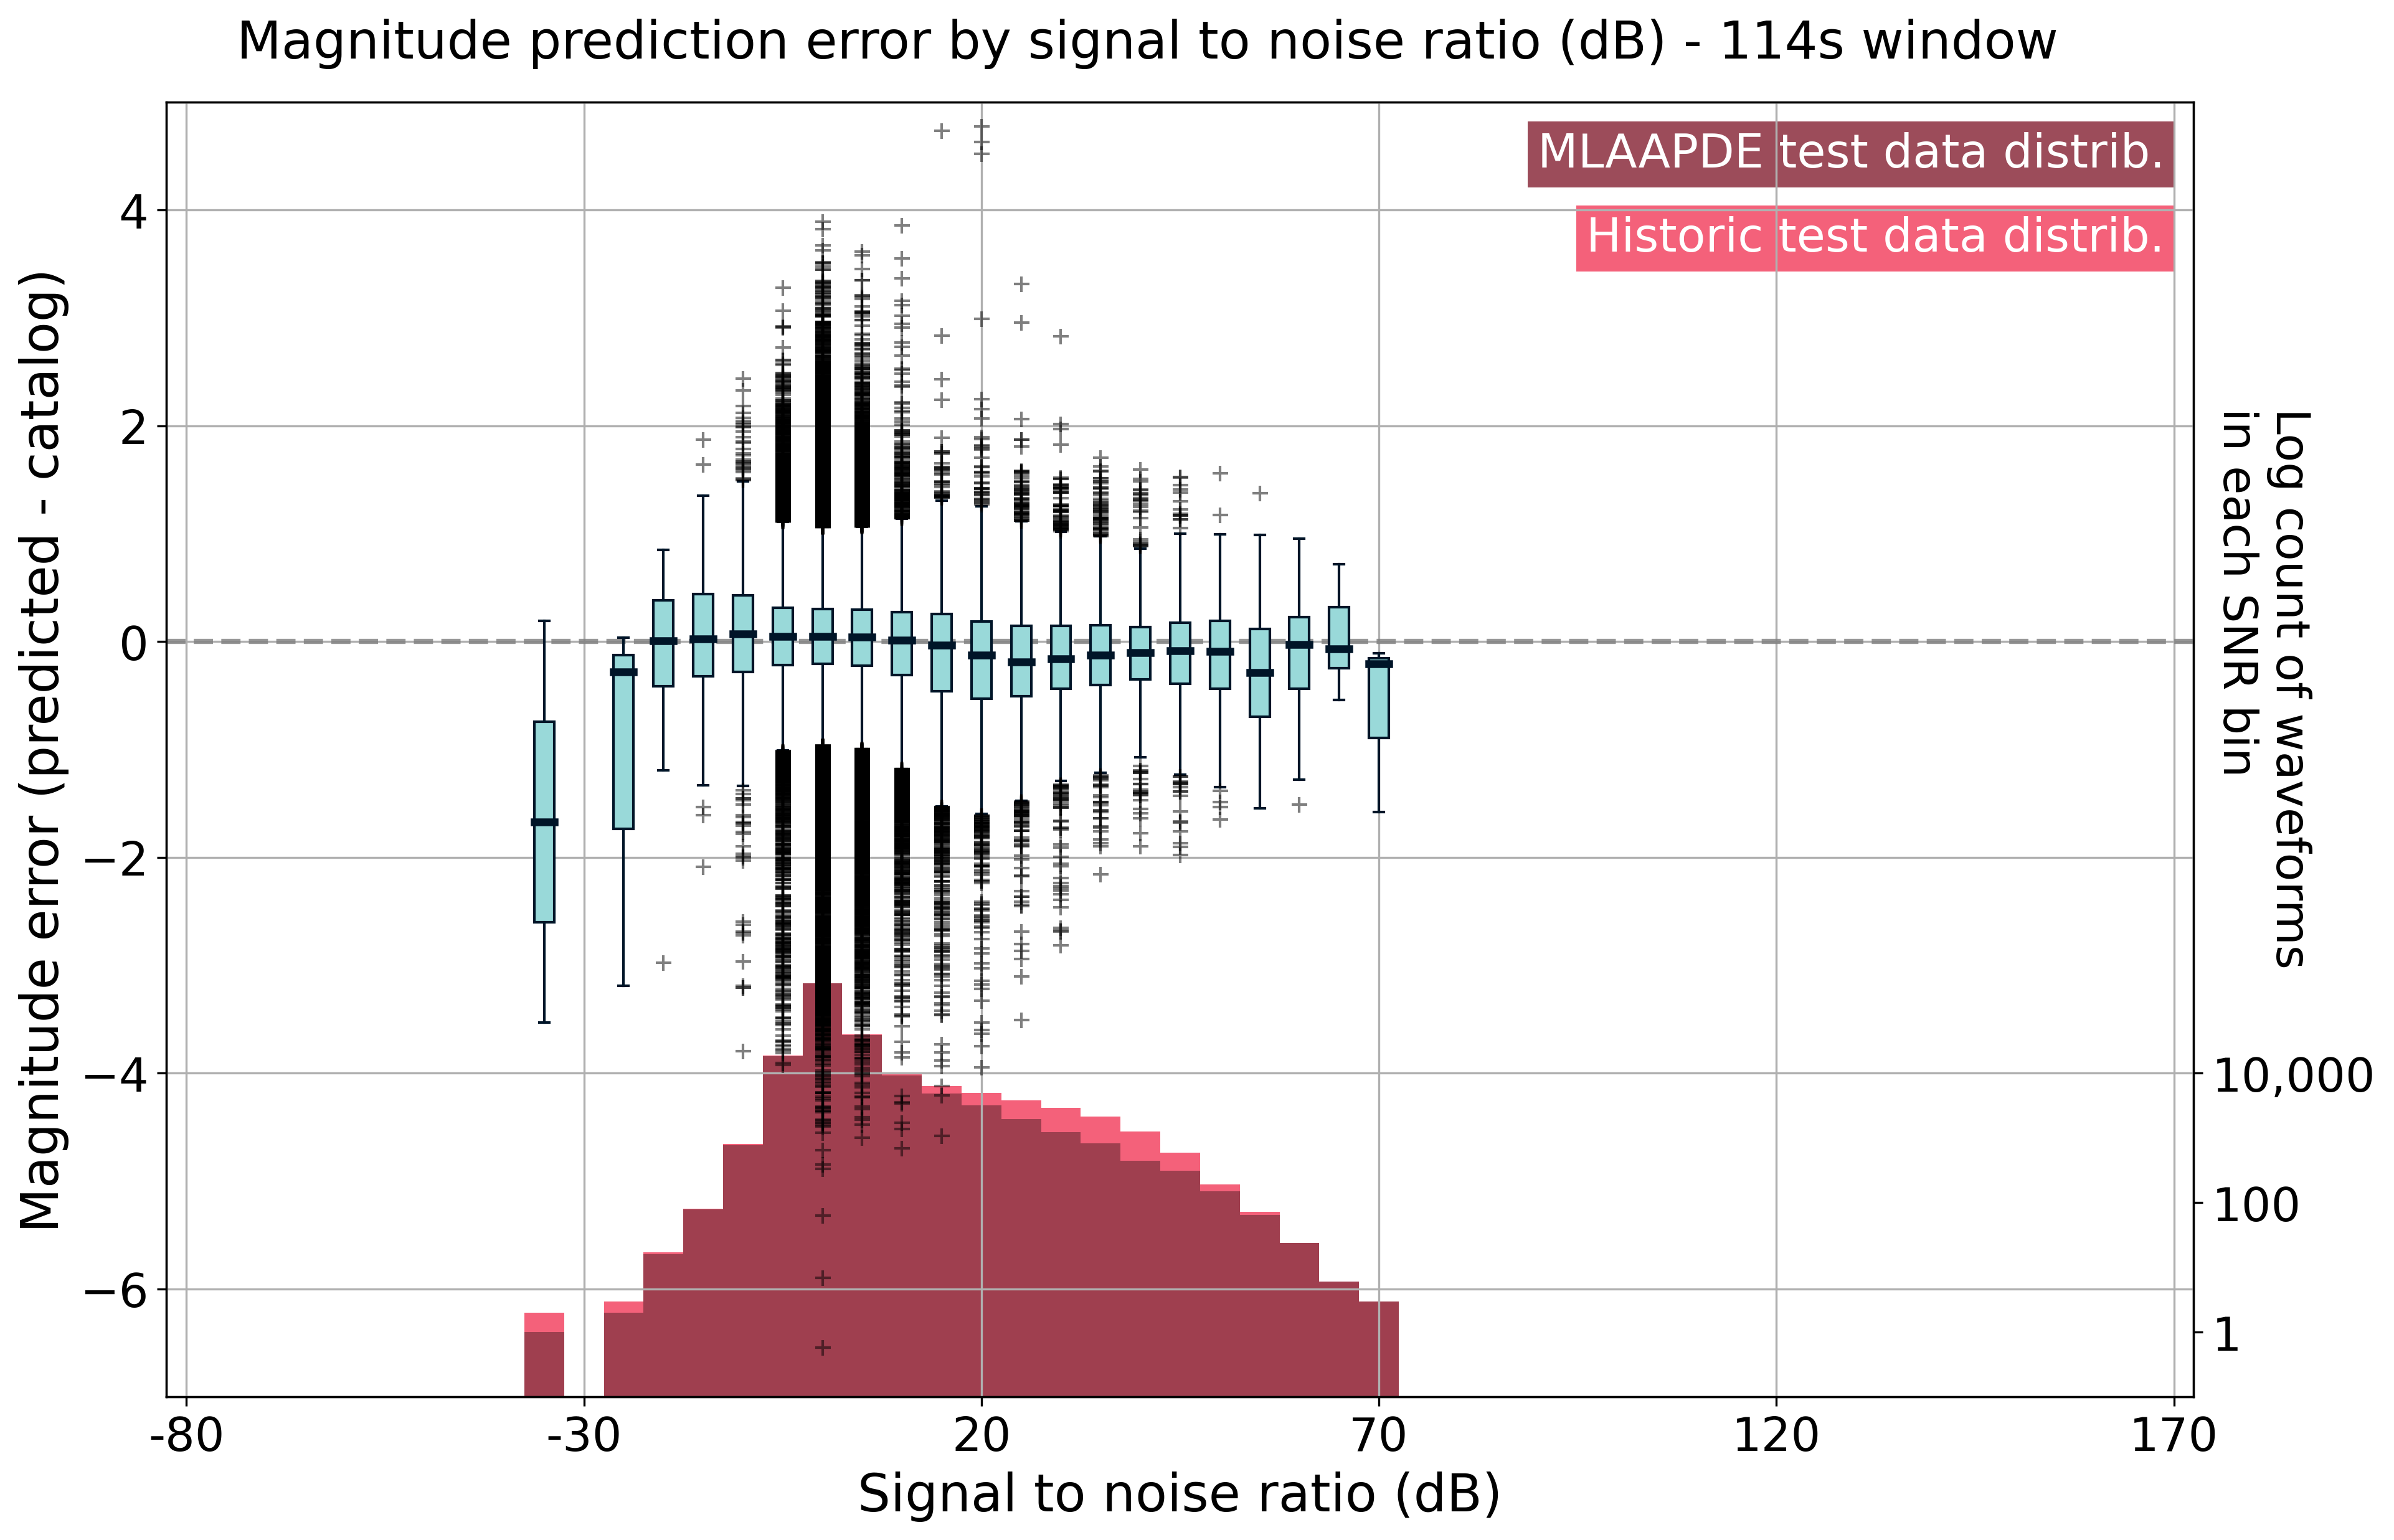

In [60]:
### ----- FIGURE 6 ----- ###

for cut_len in cut_lens:
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/errors/' + str(shift_len) + 's_window_errors.txt')
#     errors_mlaa = errors[:324365]
#     print(len(errors_mlaa))
    
    bins = np.arange(-80,175,5)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    for abin in bins:
#         print(abin)
        i = np.where(round_snrs_5 == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(errors[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('Magnitude prediction error by signal to noise ratio (dB) - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
#     both_depth_10 = [round_depth_10_mlaa/10+0.5, round_depth_10_hist/10+0.5]
    histcount_mlaa, histbins_mlaa  = np.histogram(round_mlaa_snrs_5, bins = bins)
    histcount_hist, histbins_hist  = np.histogram(round_hist_snrs_5, bins = bins)
            
    ax2 = ax.twinx()
    ax2.set_yscale('log')
#     ax2.hist(both_depth_10, bins = 70, color = ['#730114', '#f01f42'], stacked = True, zorder = 3.5) # 730114
    ax2.bar(x = histbins_hist[:-1]/5+17, height = histcount_hist+histcount_mlaa, align = 'center', width = 1, color = '#f01f42', alpha = 0.7) # Adding height of other bar so that it's stacked properly
    ax2.bar(x = histbins_mlaa[:-1]/5+17, height = histcount_mlaa, align = 'center', width = 1, color = 'black', alpha = 0.35)
#     both_snrs_5 = [round_mlaa_snrs_5/5+15.85, round_hist_snrs_5/5+15.85]
#     ax2 = ax.twinx()
#     ax2.set_yscale('log')
#     ax2.hist(both_snrs_5, bins = bins, color = ['#730114', '#f01f42'], stacked = True, alpha = 0.45, zorder = 3.5)
# #     ax2.set_ylim(0, 150000)
    ax2.set_ylim(10**-1, 10**19)
    ax2.set_yticks([10**0, 10**2, 10**4])
    ax2.set_yticklabels(['1', '100', '10,000'])
#     ax2.set_yticks([0, 10000, 20000, 30000, 40000])
#     ax2.set_yticklabels(['0', '10,000', '20,000', '30,000', '40,000'], style = 'italic')
    ax2.text(s = 'Log count of waveforms\nin each SNR bin', x = 52, y = 600000, fontsize = 18, color = 'black', rotation = 270)
    ax2.tick_params(labelsize = 18, color = 'black')
    ax2.set_zorder(2.9)
    mlaa_label = ax2.text(s = 'MLAAPDE test data distrib.', x = 35, y = 10**18, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
    hist_label = ax2.text(s = 'Historic test data distrib.', x = 36.22, y = 5*10**16, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
    mlaa_label.set_bbox(dict(facecolor = '#730114', alpha = 0.7, edgecolor = 'none'))
    hist_label.set_bbox(dict(facecolor = '#f01f42', alpha = 0.7, edgecolor = 'none'))
    
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 18, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 18, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 20, color = 'black')
    ax.set_xlabel('Signal to noise ratio (dB)', fontsize = 20, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_snr_boxplots/' + str(shift_len) + 's_window_error_snr_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();

In [32]:
bins = np.arange(-80,170,5)

In [33]:
len(bins)

50

In [34]:
max(round_snrs_5)

165.0

In [49]:
### Separating by groups

very_small_mag_is = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/very_small_mag_is.npy')
small_mag_is = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/small_mag_is.npy')
med_mag_is = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/med_mag_is.npy')
all_big_mag_is = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/all_big_mag_is.npy')

In [50]:
for cut_len in cut_lens:
    
    group = very_small_mag_is
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/errors/' + str(shift_len) + 's_window_errors.txt')
    group_errors = errors[group]
#     errors_mlaa = errors[:324365]
#     print(len(errors_mlaa))

    snrs = round_snrs_5[group]
    
    bins = np.arange(-80,175,5)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    for abin in bins:
#         print(abin)
        i = np.where(snrs == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(group_errors[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('M0.7-3.0: Magnitude prediction error by signal to noise ratio (dB) - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
# #     both_depth_10 = [round_depth_10_mlaa/10+0.5, round_depth_10_hist/10+0.5]
#     histcount_mlaa, histbins_mlaa  = np.histogram(round_mlaa_snrs_5, bins = bins)
#     histcount_hist, histbins_hist  = np.histogram(round_hist_snrs_5, bins = bins)
            
#     ax2 = ax.twinx()
#     ax2.set_yscale('log')
# #     ax2.hist(both_depth_10, bins = 70, color = ['#730114', '#f01f42'], stacked = True, zorder = 3.5) # 730114
#     ax2.bar(x = histbins_hist[:-1]/5+17, height = histcount_hist+histcount_mlaa, align = 'center', width = 1, color = '#f01f42', alpha = 0.7) # Adding height of other bar so that it's stacked properly
#     ax2.bar(x = histbins_mlaa[:-1]/5+17, height = histcount_mlaa, align = 'center', width = 1, color = 'black', alpha = 0.35)
# #     both_snrs_5 = [round_mlaa_snrs_5/5+15.85, round_hist_snrs_5/5+15.85]
# #     ax2 = ax.twinx()
# #     ax2.set_yscale('log')
# #     ax2.hist(both_snrs_5, bins = bins, color = ['#730114', '#f01f42'], stacked = True, alpha = 0.45, zorder = 3.5)
# # #     ax2.set_ylim(0, 150000)
#     ax2.set_ylim(10**-1, 10**19)
#     ax2.set_yticks([10**0, 10**2, 10**4])
#     ax2.set_yticklabels(['1', '100', '10,000'], style = 'italic')
# #     ax2.set_yticks([0, 10000, 20000, 30000, 40000])
# #     ax2.set_yticklabels(['0', '10,000', '20,000', '30,000', '40,000'], style = 'italic')
#     ax2.text(s = 'Log count of waveforms\nin each SNR bin', x = 52, y = 600000, fontsize = 16, color = 'black', rotation = 270, style = 'italic')
#     ax2.tick_params(labelsize = 14, color = 'black')
#     ax2.set_zorder(2.9)
#     mlaa_label = ax2.text(s = 'MLAAPDE test data distrib.', x = 35, y = 10**18, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
#     hist_label = ax2.text(s = 'Historic test data distrib.', x = 36.22, y = 5*10**16, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
#     mlaa_label.set_bbox(dict(facecolor = '#730114', alpha = 0.7, edgecolor = 'none'))
#     hist_label.set_bbox(dict(facecolor = '#f01f42', alpha = 0.7, edgecolor = 'none'))
    
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 14, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 14, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 16, color = 'black')
    ax.set_xlabel('Signal to noise ratio (dB)', fontsize = 16, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_snr_boxplots/mag_separation/very_small_mags/' + str(shift_len) + 's_window_error_snr_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();

1
2
3
4
5
6
7
8
9
10
11
12
13
14
19
24
29
34
44
54
64
74
84
94
104
114


In [ ]:
# round_snrs_5 = np.concatenate((round_mlaa_snrs_5, round_hist_snrs_5))

In [30]:
# Plot mlaa and historic separately ### ----- FIGURE S6 ----- ###

# mlaa_only = True
# hist_only = False

for cut_len in cut_lens_test:
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/errors/' + str(shift_len) + 's_window_errors.txt')

    errors_mlaa = errors[:324365]
    errors_hist = errors[324365:]
#     print(len(errors_mlaa))
#     print(len(errors_hist))
#     print(errors_mlaa)
#     print(errors_hist)
    
    bins = np.arange(-80,175,5)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    ### MLAA PLOT ###

    for abin in bins:
#         print(abin)
        i = np.where(round_mlaa_snrs_5 == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(errors_mlaa[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('MLAAPDE ONLY: ' + str(shift_len) + 's window', fontsize = 32, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
               
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#730114') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#99D9D9', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 30, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 30, color = 'black')
    ax.set_ylabel('Magnitude error\n(predicted - catalog)', fontsize = 32, color = 'black')
    ax.set_xlabel('Signal to noise ratio (dB)', fontsize = 32, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_snr_boxplots/catalog_separation/for_S6/MLAA_' + str(shift_len) + 's_window_error_snr_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();
    
    
    ### HISTORIC PLOT ###
    
    bins = np.arange(-80,175,5)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    for abin in bins:
#         print(abin)
        i = np.where(round_hist_snrs_5 == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(errors_hist[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('HISTORIC ONLY: ' + str(shift_len) + 's window', fontsize = 32, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
               
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#f01f42') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 30, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 30, color = 'black')
    ax.set_ylabel('Magnitude error\n(predicted - catalog)', fontsize = 32, color = 'black')
    ax.set_xlabel('Signal to noise ratio (dB)', fontsize = 32, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_snr_boxplots/catalog_separation/for_S6/hist_' + str(shift_len) + 's_window_error_snr_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();

1
114
